# Data Exploration
### Plot data characteristics and visually examine the images. 

### Setup drive

Run the following cell to mount your Drive onto Colab. Go to the given URL and once you login and copy and paste the authorization code, you should see "drive" pop up in the files tab on the left.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Click the little triangle next to "drive" and navigate to the "AI4All Chest X-Ray Project" folder. Hover over the "data" folder and click the 3 dots that appear on the right. Select "copy path" and replace the string for path_to_dataset with the path to your folder.

In [ ]:
cd "/content/drive/My Drive/AI4All Chest X-Ray Project"

/content/drive/.shortcut-targets-by-id/1iJKbtzLay6C-5OfpVHhbe1nQeNGyhFWO/AI4All Chest X-Ray Project


### Import necessary libraries
skimage (scikit-image) is a package designed specifically for preprocessing images

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import random
import seaborn as sns
from skimage import io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Setup paths

Define paths and load metadata

In [ ]:
path_to_dataset = os.path.join('docs')
#path_to_images = os.path.join(path_to_dataset, 'images')

metadata = pd.read_csv(os.path.join(path_to_dataset, 'metadata_cohen_all.csv'))

### Examine metadata

The metadata provides useful information about the dataset such as data sources and other background factors.

Print out metadata and take a look at each of the columns!

In [ ]:
metadata

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,389,16.0,F,NaN,todo,Y,NaN,NaN,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AP Supine,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,7a9ec606.jpg,10.6084/m9.figshare.12275009,https://github.com/ml-workgroup/covid-19-image...,CC BY 3.0,NaN,NaN,NaN
749,390,0.0,F,NaN,todo,NaN,NaN,NaN,N,N,NaN,NaN,NaN,75.0,NaN,NaN,NaN,PA,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,88859dc1.jpg,10.6084/m9.figshare.12275009,https://github.com/ml-workgroup/covid-19-image...,CC BY 3.0,NaN,NaN,NaN
750,391,1.0,M,NaN,todo,NaN,NaN,NaN,N,N,NaN,NaN,NaN,40.0,NaN,NaN,NaN,PA,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,3a81faf3.jpg,10.6084/m9.figshare.12275009,https://github.com/ml-workgroup/covid-19-image...,CC BY 3.0,NaN,NaN,NaN
751,391,3.0,M,NaN,todo,NaN,NaN,NaN,N,N,NaN,NaN,NaN,65.0,NaN,NaN,NaN,PA,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,bcb814aa.jpg,10.6084/m9.figshare.12275009,https://github.com/ml-workgroup/covid-19-image...,CC BY 3.0,NaN,NaN,NaN


**Check out the dataframe**

What information is provided for each image? What values are in each column?

Are there any patterns with regard to empty values in the dataset?

Write your thoughts here: 

In [ ]:
# Experiment with .isna(), .isna().any(), and .isna().any(axis = 0)
print(metadata.isna())
print(metadata.isna().any())
print(metadata.isna().any(axis = 0))


     patientid  offset    sex  ...  clinical_notes  other_notes  Unnamed: 28
0        False   False  False  ...           False         True         True
1        False   False  False  ...           False         True         True
2        False   False  False  ...           False         True         True
3        False   False  False  ...           False         True         True
4        False   False  False  ...           False         True         True
..         ...     ...    ...  ...             ...          ...          ...
748      False   False  False  ...            True         True         True
749      False   False  False  ...            True         True         True
750      False   False  False  ...            True         True         True
751      False   False  False  ...            True         True         True
752      False   False  False  ...            True         True         True

[753 rows x 29 columns]
patientid                 False
offset             

Some data sets where sex and age are missing.

In [ ]:
# plots number of covid vs no finding images in the two datasets
plt.figure(figsize=(200,100))
places = []
xvals = []
j = 0.5
for i in metadata.location:
  places.append(i)
  xvals.append(j)
  j += 1
plt.xticks(xvals, places, rotation='vertical')
sns.countplot(x='location', hue='finding', data=metadata)

Italy and Germany had the most COVID cases.

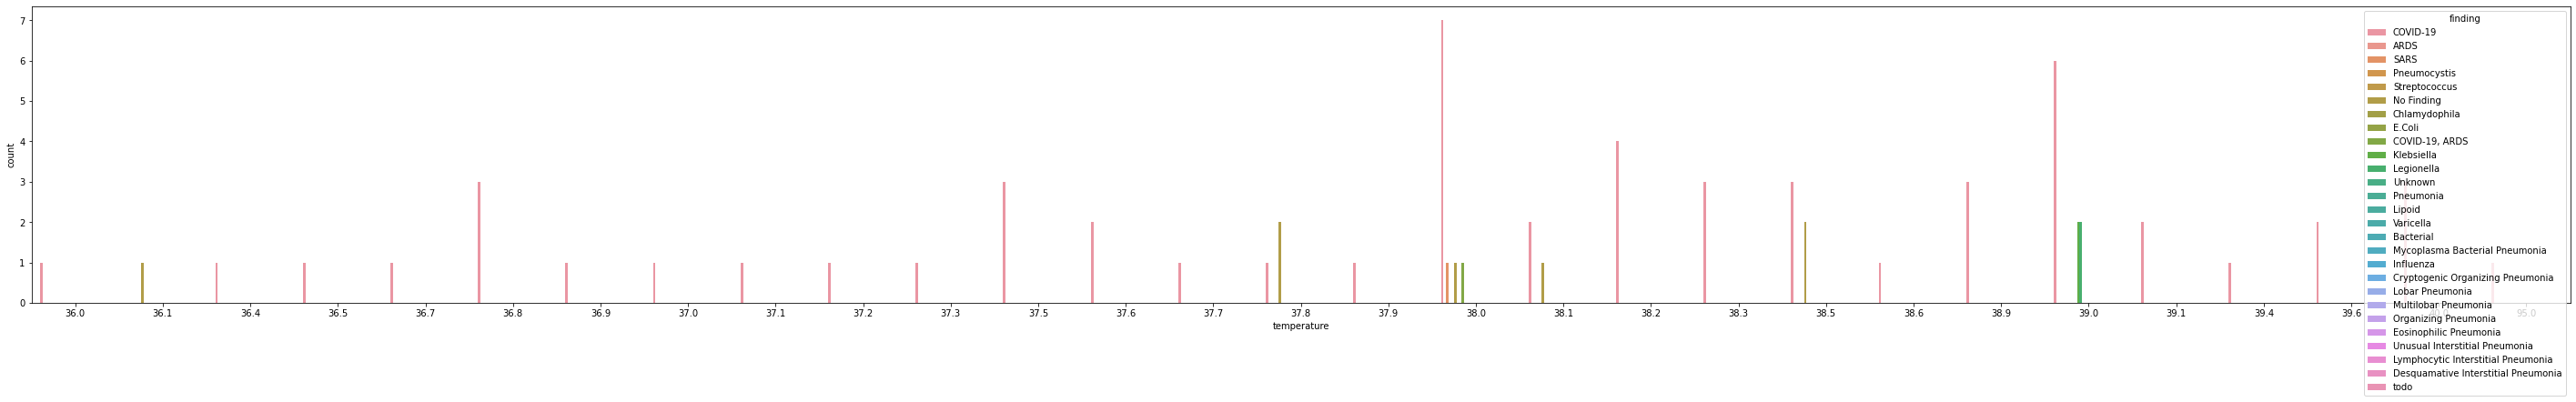

In [ ]:
# EXERCISE: try changing the x and hue to explore other factors!
plt.figure(figsize=(50,6))
temps = []
xvals = []
j = 0.5
for i in metadata.temperature:
  temps.append(i)
  xvals.append(j)
  j += 1
plt.xticks(xvals, temps, rotation='horizontal')
sns.countplot(x='temperature', hue='finding', data=metadata)


There are generally more COVID cases for patients with higher temperatures(fever conditions -> above 38 degrees celsius).

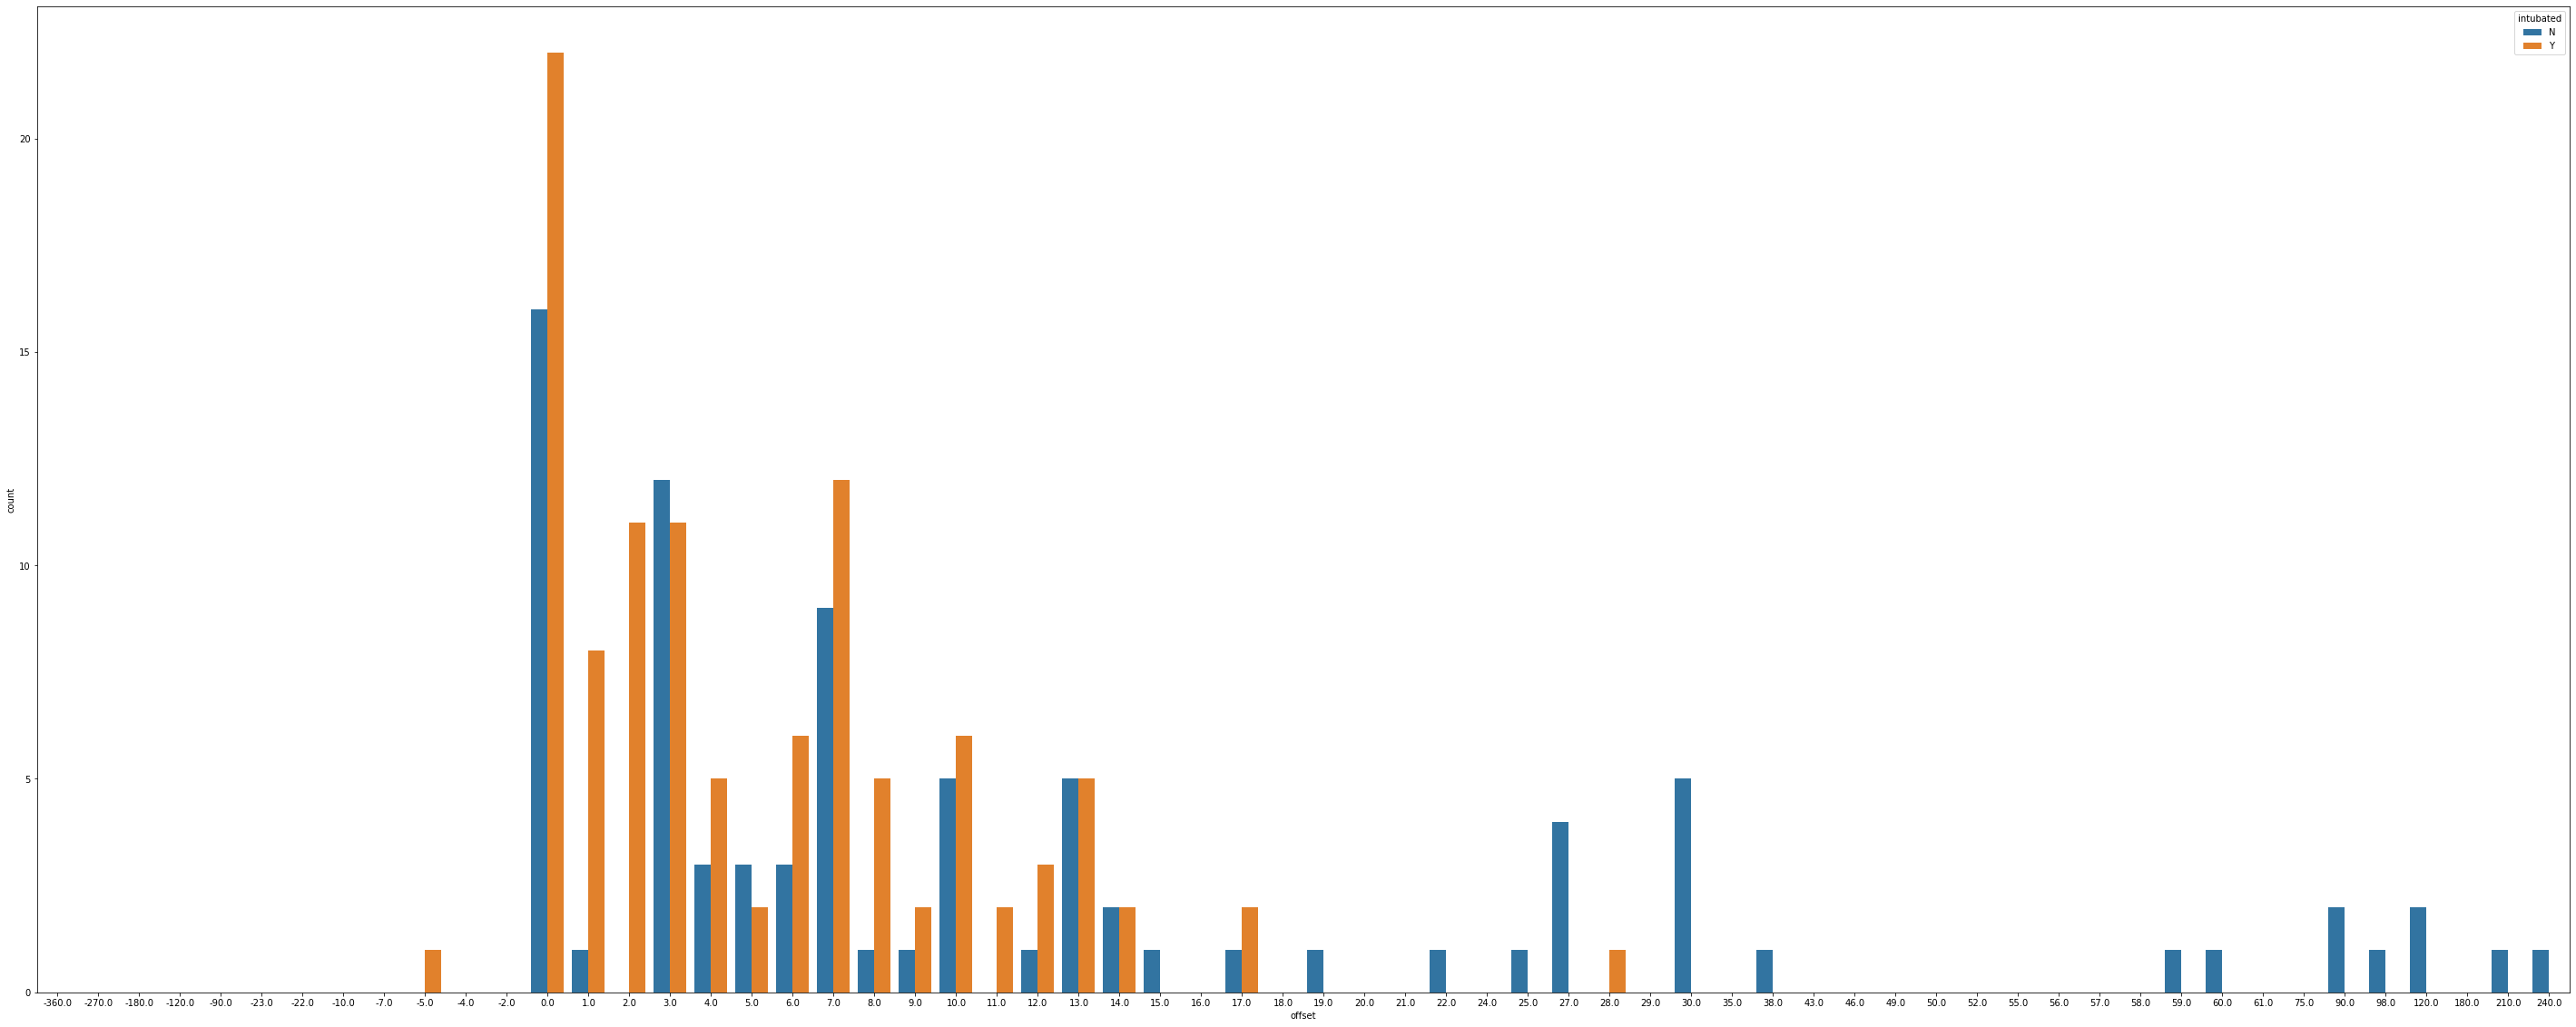

In [ ]:
plt.figure(figsize=(50,20))
sns.countplot(x='offset', hue='intubated', data=metadata)


Most patients who were intubated in between 0-13 days after they showed symptoms or were hospitalized. Patients were more likely to be intubated than not.

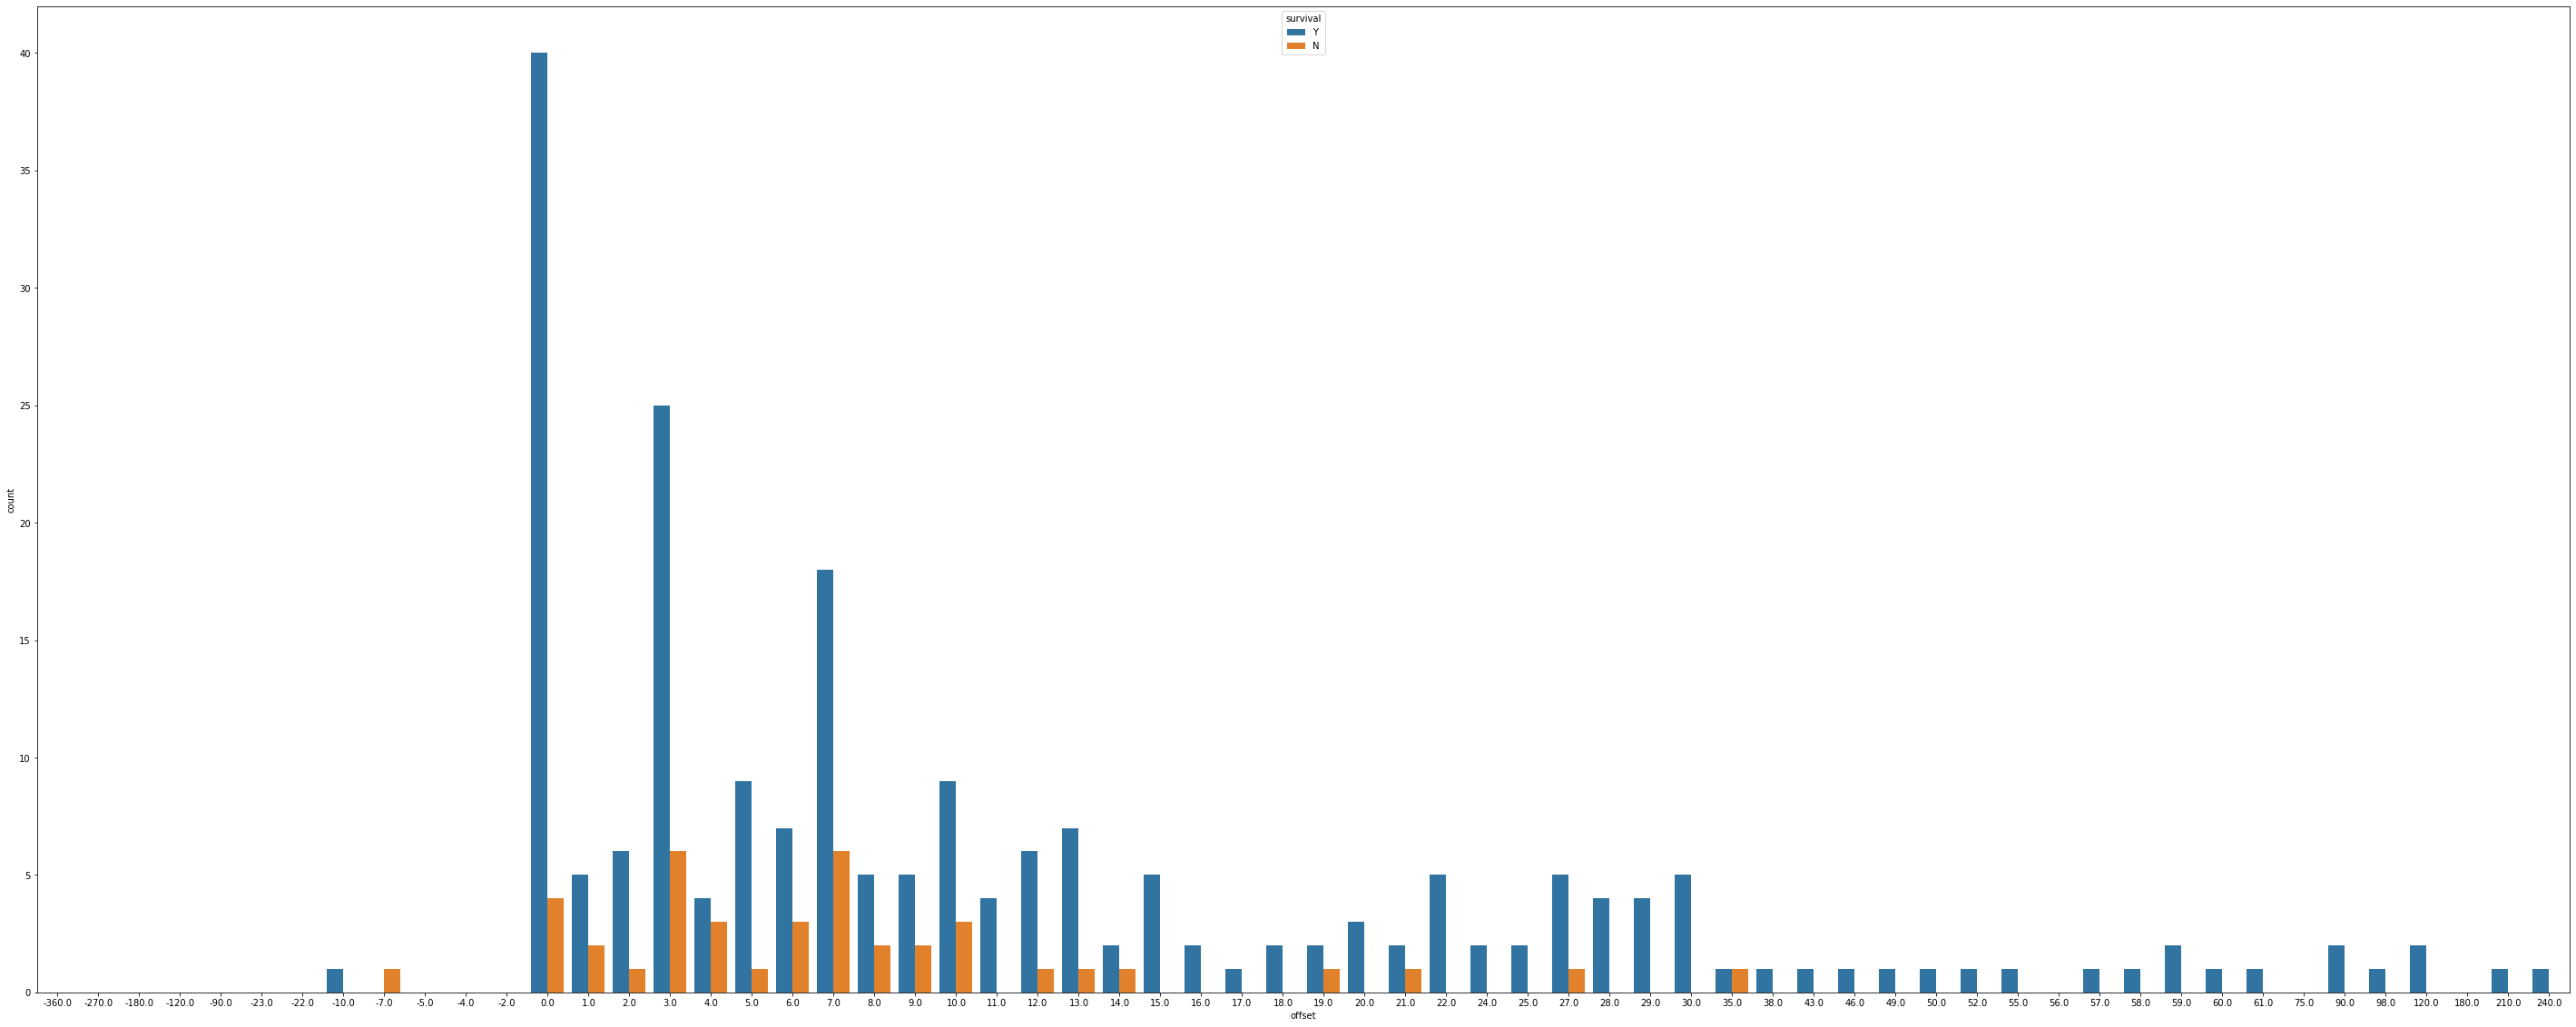

In [ ]:
plt.figure(figsize=(50,20))
sns.countplot(x='offset', hue='survival', data=metadata)


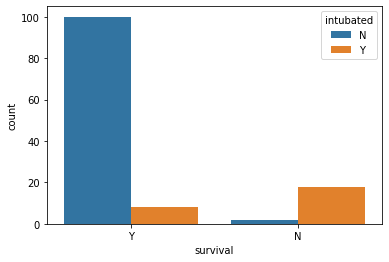

In [ ]:
sns.countplot(x='survival', hue='intubated', data=metadata)

More patients who were not intubated survivied. More patients who were intubated died.

People who showed signs or were hospitalized earlier survivied(obvious intuitively).